# Model Enhancement - Feature Engineering, Class Imbalance Handling, and Hyperparameter Optimization

In this lab, we will explore key techniques to improve machine learning models beyond their initial performance. The focus will be on three major areas: **feature engineering** to create more informative inputs, **class imbalance handling** to ensure fair learning across underrepresented classes, and **hyperparameter tuning** to optimize model performance. By applying these methods, you will gain hands-on experience with practical strategies that make models more accurate, robust, and reliable.

---

The dataset used in this lab is the **Cirrhosis Patient Survival Predition** dataset (https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1), whichoriginates from a Mayo Clinic study on primary biliary cirrhosis (PBC) conducted between 1974 and 1984. It contains data from 418 patients, described by 17 clinical features that are either real-valued or categorical. The prediction task is to classify a patient’s survival state, which is labeled as death (0), censored (1), or censored due to liver transplantation (2). Since the data includes sensitive attributes such as age and gender, it provides an opportunity to explore not only technical aspects of modeling but also considerations around fairness and ethics in healthcare applications.

## 1 Preliminaries

In [1]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing and Result Display
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE 432 ML/Model Enhancement/Copy of cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.shape

(418, 20)

Define feature and label set

In [5]:
# Feature set
X = df.drop(['Status', 'ID'], axis=1)
X.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
# Label set
y = df['Status']
y.head()

,Status
0,D
1,C
2,D
3,D
4,CL


We will do a train test split with 80-20 ratio.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2 Feature Engineering

Feature engineering is the process of shaping your raw data so that your machine learning model can understand it better. This could mean turning categories into numbers, scaling values so they’re comparable, filling in missing info, or even creating new features from the existing ones. Doing it well can make a big difference in how accurately your model predicts, sometimes even more than which algorithm you pick.

### 2.1 Label Encoding

We need a lot of preprocessing for this dataset. Let's start with label encoding. Label encoding turn categorical columns into numerical ones. In other words, they enumerate categorical values and maps them to an integer number. Before going into this step, let's have a look at X_train.

In [15]:
X_train.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [16]:
X_train.head(3)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
336,2286,NaN,20454,F,NaN,NaN,NaN,N,1.8,NaN,3.64,NaN,NaN,NaN,NaN,141.0,10.0,NaN
31,4523,Placebo,19722,F,N,Y,N,N,1.8,262.0,3.34,101.0,7277.0,82.56,158.0,286.0,10.6,4.0
84,3358,Placebo,17246,F,N,Y,N,N,2.1,262.0,3.48,58.0,2045.0,89.90,84.0,225.0,11.5,4.0


Only the categorical columns need label encoding. By looking at the data, we can understand that such columns are Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema.

Before starting label encoding, we will do these two things-
1. We will modify a copy of the dataframe instead of the original dataframe to keep the original values unchanged.
2. There are some NaN or missing values in the dataset. These values will remain as they are.
3. The same transformation should be applied to the test data. But for the test data we will use transform() instead of fit_transform() so that the encoding is same for both train and test sets.

In [17]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Create a copy to avoid modifying the original dataframe directly if needed later
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

for col in categorical_cols:
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

    # Fit on train and transform both train & test
    X_train_encoded[col] = oe.fit_transform(X_train_encoded[[col]]) + 1
    X_test_encoded[col] = oe.transform(X_test_encoded[[col]]) + 1

display(X_train_encoded.head())

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
336,2286,NaN,20454,1.0,NaN,NaN,NaN,1.0,1.8,NaN,3.64,NaN,NaN,NaN,NaN,141.0,10.0,NaN
31,4523,2.0,19722,1.0,1.0,2.0,1.0,1.0,1.8,262.0,3.34,101.0,7277.0,82.56,158.0,286.0,10.6,4.0
84,3358,2.0,17246,1.0,1.0,2.0,1.0,1.0,2.1,262.0,3.48,58.0,2045.0,89.90,84.0,225.0,11.5,4.0
287,1067,2.0,17874,1.0,1.0,2.0,1.0,2.0,8.7,310.0,3.89,107.0,637.0,117.00,242.0,298.0,9.6,2.0
317,1680,NaN,15706,1.0,NaN,NaN,NaN,1.0,0.7,NaN,3.68,NaN,NaN,NaN,NaN,306.0,9.5,2.0


We will also label encode y_train and y_test. Before labeling it looks like this-

In [18]:
y_train.head()

,0
0,2.0
1,0.0
2,2.0
3,1.0
4,0.0


After label encoding-

In [19]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
y_train = oe.fit_transform(y_train.values.reshape(-1, 1))
y_test = oe.transform(y_test.values.reshape(-1, 1))

# Ravel will flatten the values
y_train = y_train.ravel()
y_test = y_test.ravel()

# Label encoding turns the single column into numpy array. We will retransform them into pandas dataframes. This is usually not necessary, but for some special purpose we will do this.
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

y_train

,0
0,2.0
1,0.0
2,2.0
3,1.0
4,0.0
...,...
329,0.0
330,0.0
331,0.0
332,0.0


### 2.2 Removing missing values

In [20]:
X_train_encoded.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
336,2286,NaN,20454,1.0,NaN,NaN,NaN,1.0,1.8,NaN,3.64,NaN,NaN,NaN,NaN,141.0,10.0,NaN
31,4523,2.0,19722,1.0,1.0,2.0,1.0,1.0,1.8,262.0,3.34,101.0,7277.0,82.56,158.0,286.0,10.6,4.0
84,3358,2.0,17246,1.0,1.0,2.0,1.0,1.0,2.1,262.0,3.48,58.0,2045.0,89.90,84.0,225.0,11.5,4.0
287,1067,2.0,17874,1.0,1.0,2.0,1.0,2.0,8.7,310.0,3.89,107.0,637.0,117.00,242.0,298.0,9.6,2.0
317,1680,NaN,15706,1.0,NaN,NaN,NaN,1.0,0.7,NaN,3.68,NaN,NaN,NaN,NaN,306.0,9.5,2.0


Now let's focus on the values written as NaN. They are blank values or missing values. Most of the machine learning models can't work with missing values, so we need to handle them somehow.

Our first strategy will be to drop them altogether.

In [21]:
X_test_encoded.shape, y_test.shape

((84, 18), (84,))

In [22]:
print(f'Before removing missing values - X_train_encoded: {X_train_encoded.shape}')
print(f'Before removing missing values - X_test_encoded: {X_test_encoded.shape}')

X_train_encoded_dropped = X_train_encoded.dropna().reset_index(drop=True)
y_train_dropped = y_train[X_train_encoded_dropped.index].reset_index(drop=True)
X_test_encoded_dropped = X_test_encoded.dropna().reset_index(drop=True)
y_test_dropped = y_test[X_test_encoded_dropped.index].reset_index(drop=True)

print(f'After removing missing values: {X_train_encoded_dropped.shape}')
print(f'After removing missing values: {X_test_encoded_dropped.shape}')

Before removing missing values - X_train_encoded: (334, 18)
Before removing missing values - X_test_encoded: (84, 18)
After removing missing values: (225, 18)
After removing missing values: (51, 18)


There are other things we can do, but before going there we will first do a performance check on this prepared dataset. We will have to do the same operation multiple times later, so let's write a function that will train machine learning models and test them for us.

In [23]:
# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def train_and_evaluate_models(X_train, y_train, X_test, y_test):

    result = {}

    models = [
        LogisticRegression(max_iter=1000, random_state=42),
        RandomForestClassifier(random_state=42),
        AdaBoostClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        SVC(random_state=42),
        DecisionTreeClassifier(random_state=42),
        KNeighborsClassifier(), # KNeighborsClassifier does not have random_state
        MLPClassifier(random_state=42),
        GaussianNB() # GaussianNB does not have random_state
    ]

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"{model.__class__.__name__} Accuracy: {accuracy_score(y_test, y_pred)}")
        result[model.__class__.__name__] = accuracy_score(y_test, y_pred)

    return result

We will train and test on X_train_encoded_dropped, y_train_dropped, X_test_encoded_dropped, y_test_dropped

In [25]:
# Now call the function with your data
result_encoded_dropped = train_and_evaluate_models(X_train_encoded_dropped, y_train_dropped, X_test_encoded_dropped, y_test_dropped)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.47058823529411764
RandomForestClassifier Accuracy: 0.49019607843137253
AdaBoostClassifier Accuracy: 0.49019607843137253
GradientBoostingClassifier Accuracy: 0.4117647058823529
SVC Accuracy: 0.49019607843137253
DecisionTreeClassifier Accuracy: 0.4117647058823529
KNeighborsClassifier Accuracy: 0.6274509803921569
MLPClassifier Accuracy: 0.47058823529411764
GaussianNB Accuracy: 0.49019607843137253


TERRIBLE PERFORMANCE! Now, let's try to improve this.

### 2.3 Imputing Missing Values

Instead of removing missing values altogether, we will now impute them. Imputation means filling up the missing values with actual values. They can be filled up using prior knowledge of the dataset, the data scientist's intention, statistical single imputation or even more complex multi imputation.

We will use something simpler. First, let's have a look at which columns have missing values.

In [26]:
X_train_encoded.isna().sum()

,0
N_Days,0
Drug,78
Age,0
Sex,0
Ascites,78
Hepatomegaly,78
Spiders,78
Edema,0
Bilirubin,0
Cholesterol,103


Almost all of them have missing values. As we know, some of these columns were originally categorical and some were numerical. Different types of columns need different approaches. First we will go with numerical columns and apply a simple imputation. The missing values will be filled with the mean or average of the other values in their column.

In [27]:
from sklearn.impute import SimpleImputer

# Identify numerical columns
numerical_cols = X_train_encoded.columns.difference(categorical_cols)

# Create copies of the original
X_train_imputed = X_train_encoded.copy()
X_test_imputed = X_test_encoded.copy()

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Apply imputation to numerical columns in train and test sets
X_train_imputed[numerical_cols] = imputer.fit_transform(X_train_encoded[numerical_cols])
X_test_imputed[numerical_cols] = imputer.transform(X_test_encoded[numerical_cols])

X_train_imputed.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
336,2286.0,NaN,20454.0,1.0,NaN,NaN,NaN,1.0,1.8,372.805195,3.64,92.905512,1871.60625,117.136016,125.747826,141.0,10.0,3.00303
31,4523.0,2.0,19722.0,1.0,1.0,2.0,1.0,1.0,1.8,262.000000,3.34,101.000000,7277.00000,82.560000,158.000000,286.0,10.6,4.00000
84,3358.0,2.0,17246.0,1.0,1.0,2.0,1.0,1.0,2.1,262.000000,3.48,58.000000,2045.00000,89.900000,84.000000,225.0,11.5,4.00000
287,1067.0,2.0,17874.0,1.0,1.0,2.0,1.0,2.0,8.7,310.000000,3.89,107.000000,637.00000,117.000000,242.000000,298.0,9.6,2.00000
317,1680.0,NaN,15706.0,1.0,NaN,NaN,NaN,1.0,0.7,372.805195,3.68,92.905512,1871.60625,117.136016,125.747826,306.0,9.5,2.00000


Let's look at a comparison

In [28]:
missing_before = X_train_encoded.isna().sum()
missing_after = X_train_imputed.isna().sum()

# Combine the missing value counts into a DataFrame
missing_comparison = pd.DataFrame({
    'Before Imputation': missing_before,
    'After Imputation': missing_after
})

# Display the table, filtering to show only columns that had missing values
display(missing_comparison[missing_comparison['Before Imputation'] > 0])

,Before Imputation,After Imputation
Drug,78,78
Ascites,78,78
Hepatomegaly,78,78
Spiders,78,78
Cholesterol,103,0
Copper,80,0
Alk_Phos,78,0
SGOT,78,0
Tryglicerides,104,0
Platelets,9,0


Now we need to deal witht the categorical columns. There are several strategies we can follow.

1. Statistical Imputation: Fill missing values with a significant value. For example, we can use mode, the value most frequently occuring in a column.
2. New Category: Keep missing values as a new category.
3. Predictive Imputation: Apply another machine learning model to fill up the missing values.

We will go with option 2 for now. When doing label encoding before, we started indexing from 1. Therefore, we can simply set all missing values as 0 now.

In [29]:
X_train_imputed.fillna(0, inplace=True)
X_test_imputed.fillna(0, inplace=True)

X_train_imputed.isna().sum()

,0
N_Days,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0
Cholesterol,0


Let's train and test again.

In [30]:
result_imputed = train_and_evaluate_models(X_train_imputed, y_train, X_test_imputed, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.8214285714285714
RandomForestClassifier Accuracy: 0.75
AdaBoostClassifier Accuracy: 0.7619047619047619
GradientBoostingClassifier Accuracy: 0.7857142857142857
SVC Accuracy: 0.6428571428571429
DecisionTreeClassifier Accuracy: 0.6785714285714286
KNeighborsClassifier Accuracy: 0.7142857142857143
MLPClassifier Accuracy: 0.6547619047619048
GaussianNB Accuracy: 0.75


Let's do a comparison.

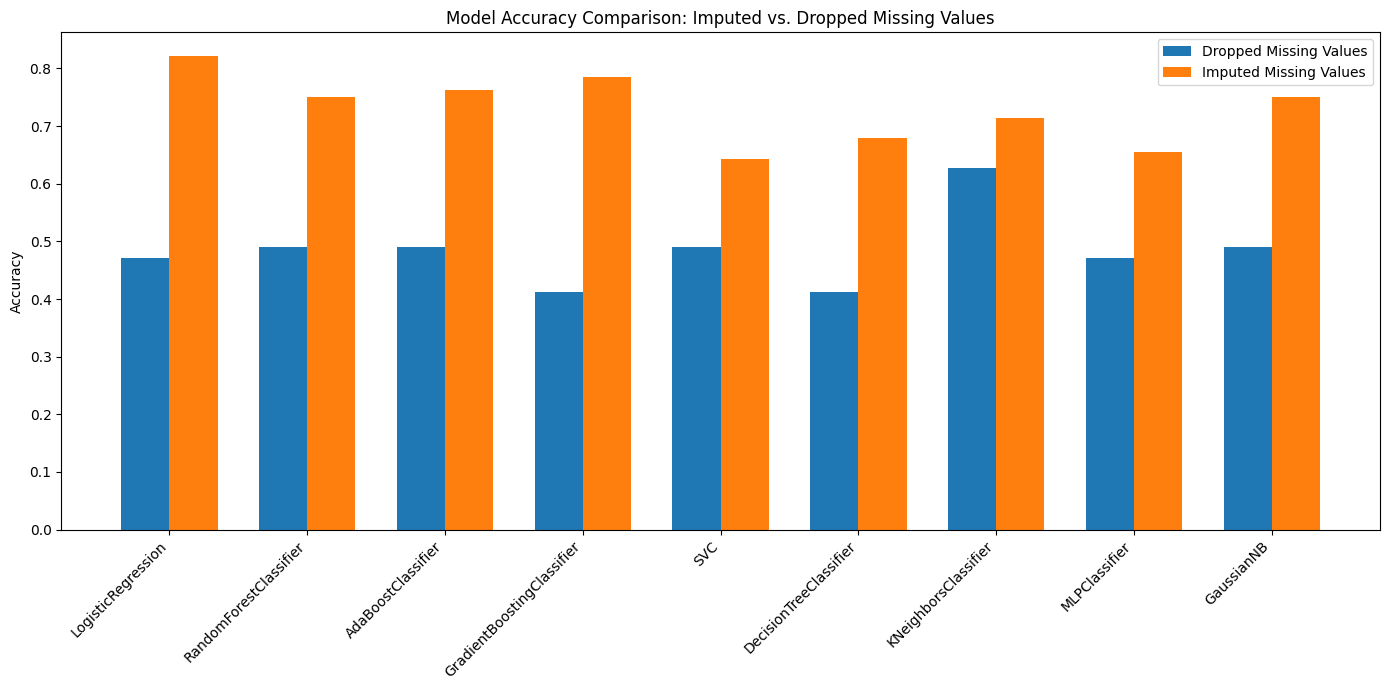

In [31]:
#@title Model Accuracy Comparison

# Tableau 10 (colorblind-friendly and widely used in publications)
colors = [
    "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Olive
    "#17becf"   # Cyan
]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

models = list(result_imputed.keys())
accuracies_dropped = list(result_encoded_dropped.values())
accuracies_imputed = list(result_imputed.values()) # Get accuracy for dropped, use 0 if model not present

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

rects2 = ax.bar(x - width/2, accuracies_dropped, width, label='Dropped Missing Values')
rects1 = ax.bar(x + width/2, accuracies_imputed, width, label='Imputed Missing Values')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison: Imputed vs. Dropped Missing Values')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

GREAT IMPROVEMENT! But, can we do better?

### 2.4 Feature Scaling or Normalization

Feature scaling or normalization brings all the values into a specific range. They are especially useful for models that are distance or values based (knn, svm, mlp). We will apply normalization on the dataset.

Usually normalization is applied on numerical columns, but we will also apply it on categorical columns as the values of the same category will remain the same.

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a MinMaxScaler object
# We could also use StandardScaler
scaler = MinMaxScaler()

# Apply scaling to the imputed data and create new variables
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Convert back to DataFrame to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_imputed.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_imputed.columns)

X_train_scaled.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0.500892,0.0,0.569809,0.0,0.0,0.0,0.0,0.0,0.054152,0.152752,0.626866,0.193273,0.132217,0.291308,0.147559,0.119879,0.123457,0.667677
1,1.000000,1.0,0.531388,0.0,0.5,1.0,0.5,0.0,0.054152,0.085801,0.514925,0.210870,0.583803,0.180363,0.205776,0.339909,0.197531,1.000000
2,0.740071,1.0,0.401428,0.0,0.5,1.0,0.5,0.0,0.064982,0.085801,0.567164,0.117391,0.146703,0.203915,0.072202,0.247344,0.308642,1.000000
3,0.228916,1.0,0.434390,0.0,0.5,1.0,0.5,0.5,0.303249,0.114804,0.720149,0.223913,0.029073,0.290871,0.357401,0.358118,0.074074,0.333333
4,0.365685,0.0,0.320596,0.0,0.0,0.0,0.0,0.0,0.014440,0.152752,0.641791,0.193273,0.132217,0.291308,0.147559,0.370258,0.061728,0.333333


In [33]:
result_scaled = train_and_evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)

LogisticRegression Accuracy: 0.8214285714285714
RandomForestClassifier Accuracy: 0.7619047619047619
AdaBoostClassifier Accuracy: 0.7619047619047619
GradientBoostingClassifier Accuracy: 0.7857142857142857
SVC Accuracy: 0.8095238095238095
DecisionTreeClassifier Accuracy: 0.6785714285714286
KNeighborsClassifier Accuracy: 0.7023809523809523
MLPClassifier Accuracy: 0.8214285714285714
GaussianNB Accuracy: 0.75


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


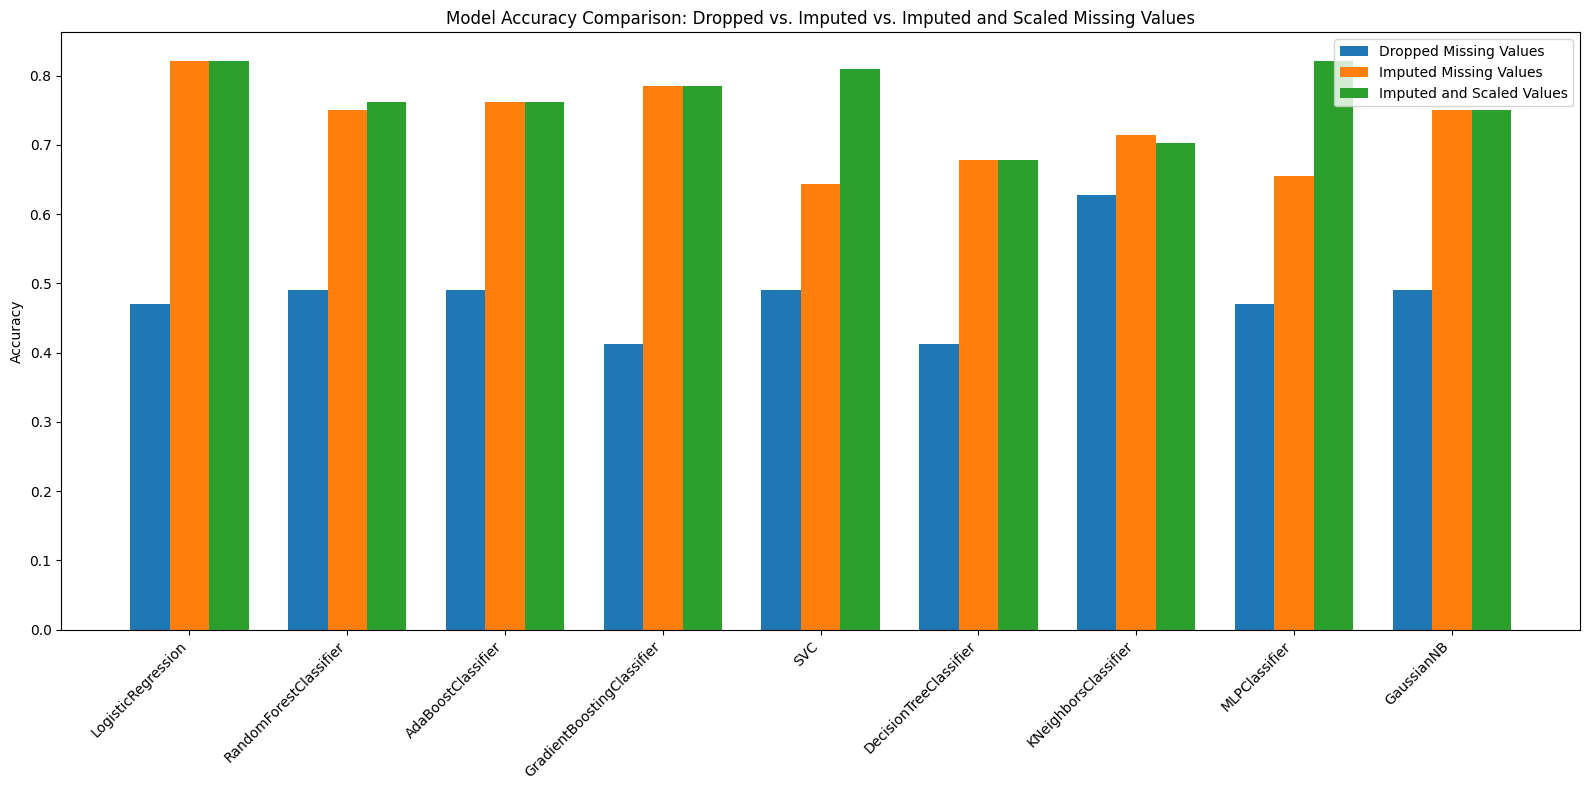

In [34]:
#@title Model Accuracy Comparison

models = list(result_scaled.keys())
accuracies_dropped = [result_encoded_dropped.get(model, 0) for model in models] # Get accuracy for dropped, use 0 if model not present
accuracies_imputed = [result_imputed.get(model, 0) for model in models] # Get accuracy for imputed, use 0 if model not present
accuracies_imputed_scaled = list(result_scaled.values())

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))

rects1 = ax.bar(x - width, accuracies_dropped, width, label='Dropped Missing Values')
rects2 = ax.bar(x, accuracies_imputed, width, label='Imputed Missing Values')
rects3 = ax.bar(x + width, accuracies_imputed_scaled, width, label='Imputed and Scaled Values')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison: Dropped vs. Imputed vs. Imputed and Scaled Missing Values')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

### 2.5 One Hot Encoding

We used label encoder to enumerate the categorical columns. However, the values in the categorical columns don't mean anything. So even though they were numerically encoded, the values themselves are not effective.

A solution to this is one hot encoding. In one hot encoding, we turn a categorical column into multiple columns representing each type of category. The new columns have binary values.

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns (from earlier definition)
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Create a OneHotEncoder object
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply one-hot encoding to the categorical columns in the scaled and imputed data
X_train_ohe = ohe.fit_transform(X_train_scaled[categorical_cols])
X_test_ohe = ohe.transform(X_test_scaled[categorical_cols])

# Create DataFrames from the one-hot encoded arrays with appropriate column names
# Get the feature names for the one-hot encoded columns
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=X_train_scaled.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe_feature_names, index=X_test_scaled.index)

# Drop the original categorical columns from the scaled and imputed dataframes
X_train_processed = X_train_scaled.drop(columns=categorical_cols)
X_test_processed = X_test_scaled.drop(columns=categorical_cols)

# Concatenate the one-hot encoded dataframes with the remaining numerical columns
X_train_ohe_processed = pd.concat([X_train_processed, X_train_ohe_df], axis=1)
X_test_ohe_processed = pd.concat([X_test_processed, X_test_ohe_df], axis=1)


X_train_ohe_processed.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Ascites_1.0,Hepatomegaly_0.0,Hepatomegaly_0.5,Hepatomegaly_1.0,Spiders_0.0,Spiders_0.5,Spiders_1.0,Edema_0.0,Edema_0.5,Edema_1.0
0,0.500892,0.569809,0.054152,0.152752,0.626866,0.193273,0.132217,0.291308,0.147559,0.119879,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.000000,0.531388,0.054152,0.085801,0.514925,0.210870,0.583803,0.180363,0.205776,0.339909,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.740071,0.401428,0.064982,0.085801,0.567164,0.117391,0.146703,0.203915,0.072202,0.247344,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.228916,0.434390,0.303249,0.114804,0.720149,0.223913,0.029073,0.290871,0.357401,0.358118,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.365685,0.320596,0.014440,0.152752,0.641791,0.193273,0.132217,0.291308,0.147559,0.370258,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


List of all the columns in the dataframe now

In [36]:
X_train_ohe_processed.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_0.0', 'Drug_0.5', 'Drug_1.0', 'Sex_0.0', 'Sex_1.0',
       'Ascites_0.0', 'Ascites_0.5', 'Ascites_1.0', 'Hepatomegaly_0.0',
       'Hepatomegaly_0.5', 'Hepatomegaly_1.0', 'Spiders_0.0', 'Spiders_0.5',
       'Spiders_1.0', 'Edema_0.0', 'Edema_0.5', 'Edema_1.0'],
      dtype='object')

In [37]:
result_ohe = train_and_evaluate_models(X_train_ohe_processed, y_train, X_test_ohe_processed, y_test)

LogisticRegression Accuracy: 0.8452380952380952
RandomForestClassifier Accuracy: 0.7738095238095238
AdaBoostClassifier Accuracy: 0.7619047619047619
GradientBoostingClassifier Accuracy: 0.8095238095238095
SVC Accuracy: 0.7857142857142857
DecisionTreeClassifier Accuracy: 0.5952380952380952
KNeighborsClassifier Accuracy: 0.6785714285714286
MLPClassifier Accuracy: 0.8095238095238095
GaussianNB Accuracy: 0.19047619047619047


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


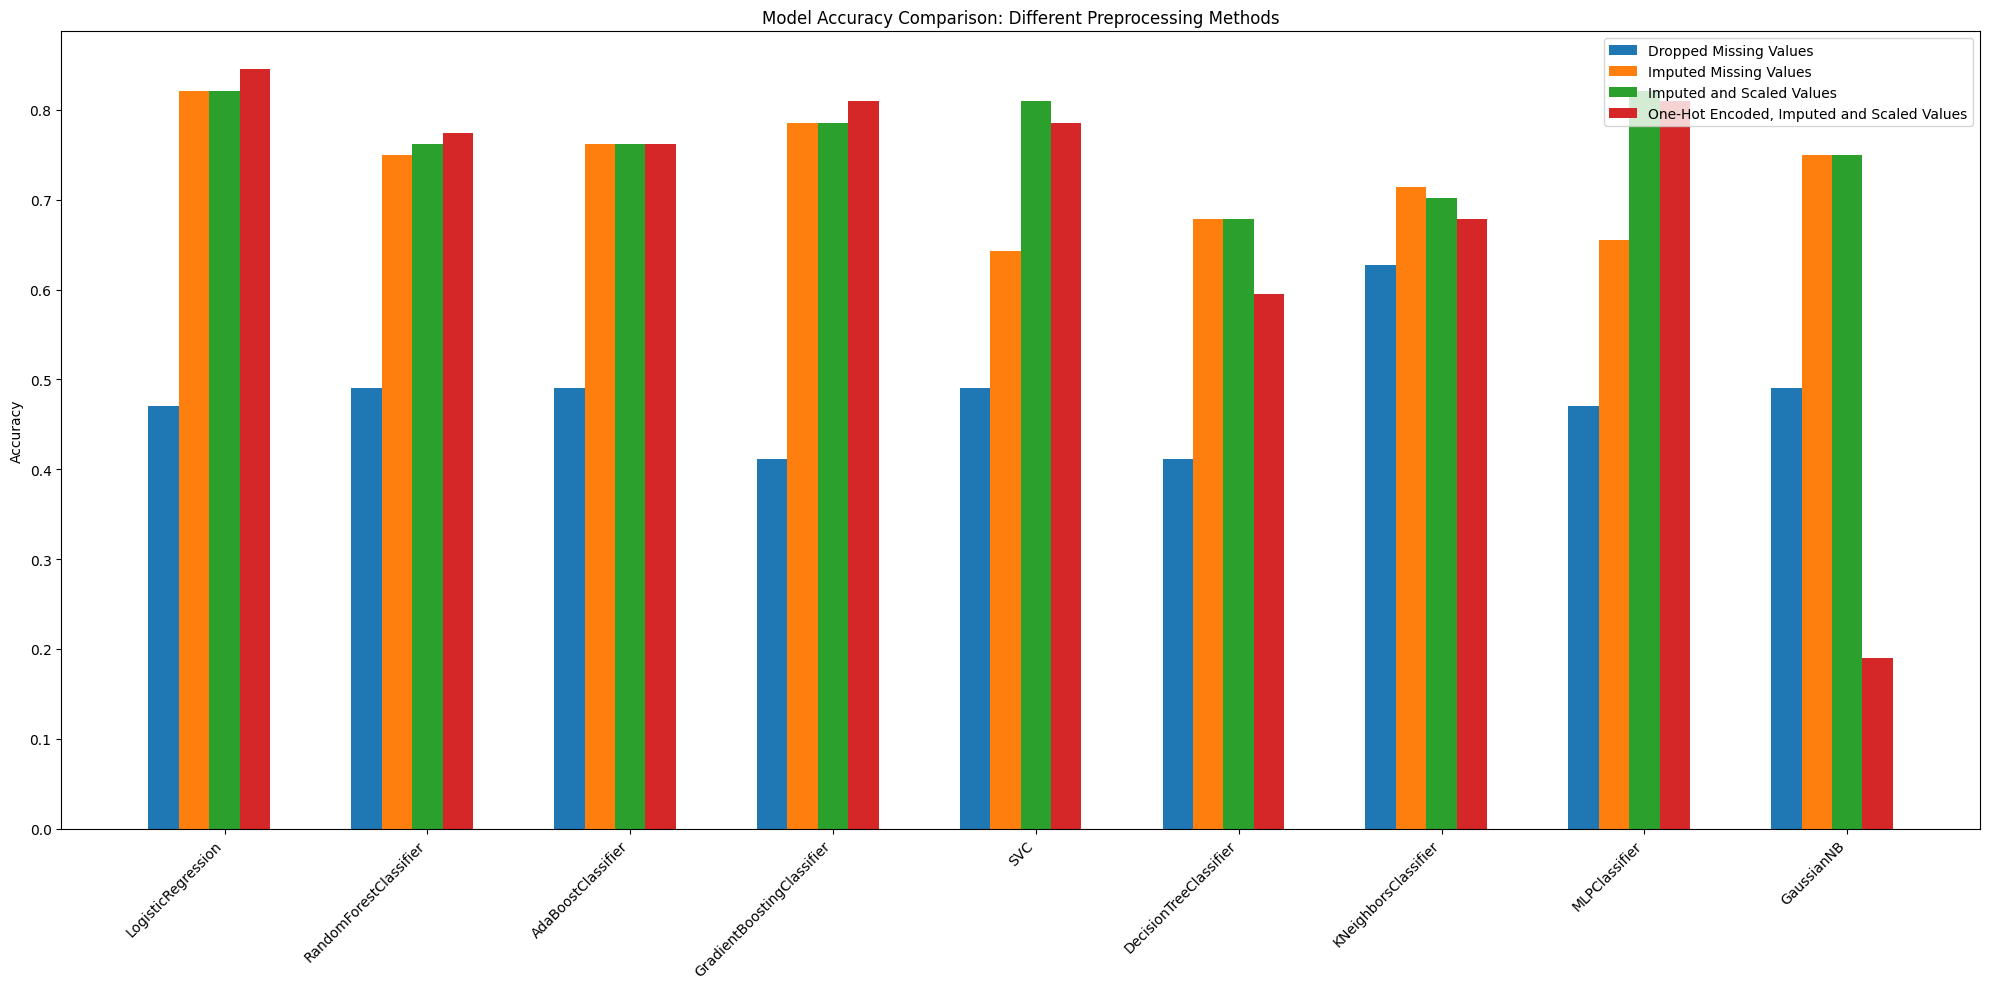

In [38]:
#@title Model Accuracy Comparison

models = list(result_ohe.keys()) # Use keys from ohe as it likely has all models
accuracies_dropped = [result_encoded_dropped.get(model, 0) for model in models] # Get accuracy for dropped, use 0 if model not present
accuracies_imputed = [result_imputed.get(model, 0) for model in models] # Get accuracy for imputed, use 0 if model not present
accuracies_imputed_scaled = [result_scaled.get(model, 0) for model in models] # Get accuracy for imputed and scaled, use 0 if model not present
accuracies_ohe = list(result_ohe.values())

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width*2, accuracies_dropped, width, label='Dropped Missing Values')
rects2 = ax.bar(x - width, accuracies_imputed, width, label='Imputed Missing Values')
rects3 = ax.bar(x, accuracies_imputed_scaled, width, label='Imputed and Scaled Values')
rects5 = ax.bar(x + width, accuracies_ohe, width, label='One-Hot Encoded, Imputed and Scaled Values')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison: Different Preprocessing Methods')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

In [39]:
X_train_ohe_processed.shape

(334, 29)

### 2.6 Feature Selection

Feature selection is basically picking out the features that actually matter for your model and getting rid of the noisy or irrelevant ones. This makes your model faster, less likely to overfit, and easier to understand. You can do it in different ways, like checking correlations, using recursive elimination, or letting models like Lasso or Random Forest tell you which features are important.

Here we will use RFECV that's especially useful for smaller datasets. RFECV (Recursive Feature Elimination with Cross-Validation) is a smart way to pick the best features for your model automatically. It works by repeatedly training the model, ranking the features by importance, and removing the least important ones step by step. At each stage, it uses cross-validation to check how well the model is performing, and in the end, it selects the number of features that gives the best performance. This way, you get a smaller, more relevant set of features without manually guessing which ones to keep.

To generate feature importance, the **logistic regression** model will be used.

In [40]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RFECV with Logistic Regression and 5-fold cross-validation
# Using StratifiedKFold to maintain class distribution in folds
rfecv = RFECV(estimator=log_reg, step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv.fit(X_train_ohe_processed, y_train)

print(f"Optimal number of features : {rfecv.n_features_}")
print("Selected features:")
print(X_train_ohe_processed.columns[rfecv.support_])

Optimal number of features : 28
Selected features:
Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_0.0', 'Drug_0.5', 'Drug_1.0', 'Sex_0.0', 'Sex_1.0',
       'Ascites_0.0', 'Ascites_0.5', 'Ascites_1.0', 'Hepatomegaly_0.0',
       'Hepatomegaly_0.5', 'Hepatomegaly_1.0', 'Spiders_0.0', 'Spiders_0.5',
       'Edema_0.0', 'Edema_0.5', 'Edema_1.0'],
      dtype='object')


In [41]:
# Get the selected features
selected_features = X_train_ohe_processed.columns[rfecv.support_]

# Filter the training and testing data to include only the selected features
X_train_selected = X_train_ohe_processed[selected_features]
X_test_selected = X_test_ohe_processed[selected_features]

# Train and evaluate models using the selected features
result_selected_features = train_and_evaluate_models(X_train_selected, y_train, X_test_selected, y_test)

LogisticRegression Accuracy: 0.8452380952380952
RandomForestClassifier Accuracy: 0.7857142857142857
AdaBoostClassifier Accuracy: 0.7619047619047619
GradientBoostingClassifier Accuracy: 0.8095238095238095
SVC Accuracy: 0.7976190476190477
DecisionTreeClassifier Accuracy: 0.7023809523809523
KNeighborsClassifier Accuracy: 0.6666666666666666
MLPClassifier Accuracy: 0.8333333333333334
GaussianNB Accuracy: 0.19047619047619047


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


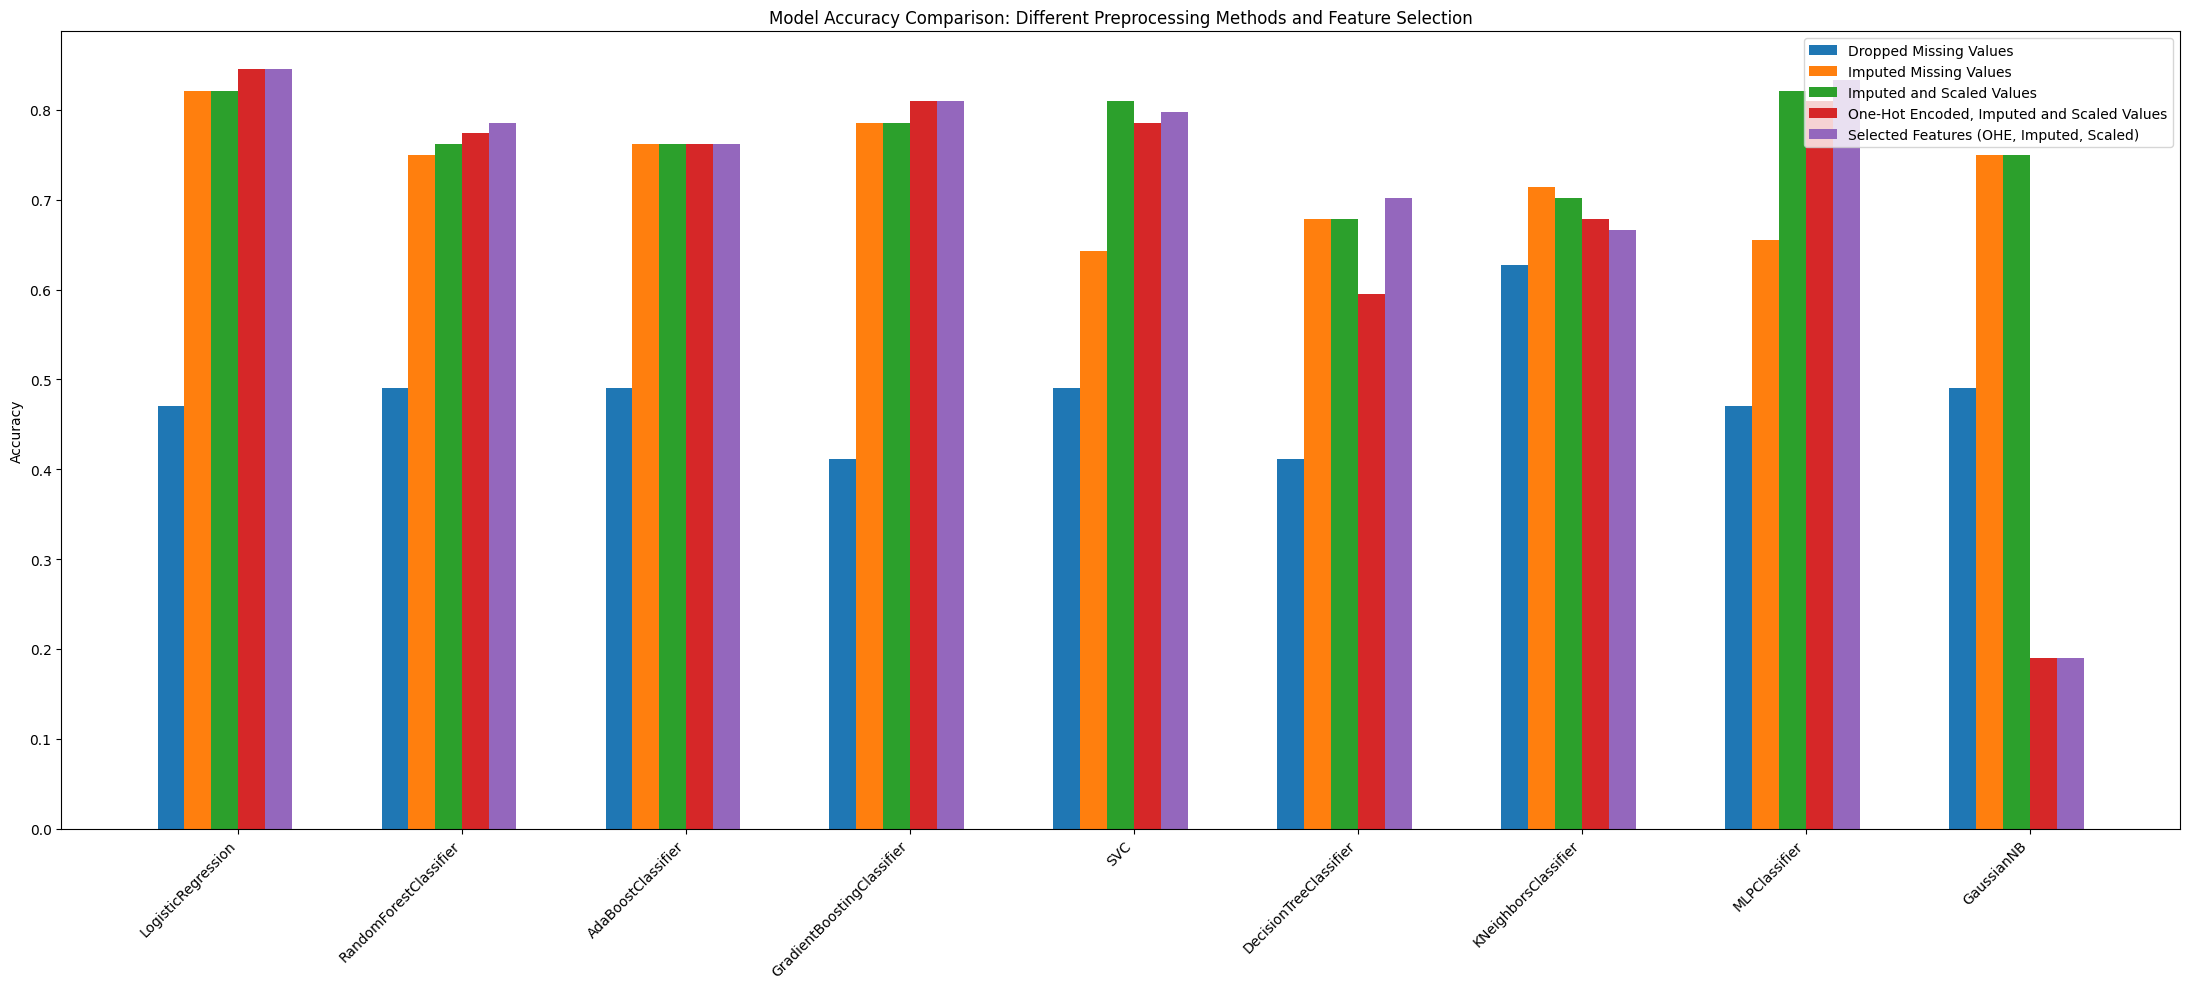

In [42]:
#@title Model Accuracy Comparison

models = list(result_ohe.keys()) # Use keys from ohe as it likely has all models
accuracies_dropped = [result_encoded_dropped.get(model, 0) for model in models] # Get accuracy for dropped, use 0 if model not present
accuracies_imputed = [result_imputed.get(model, 0) for model in models] # Get accuracy for imputed, use 0 if model not present
accuracies_imputed_scaled = [result_scaled.get(model, 0) for model in models] # Get accuracy for imputed and scaled, use 0 if model not present
accuracies_ohe = list(result_ohe.values())
accuracies_selected = [result_selected_features.get(model, 0) for model in models] # Get accuracy for selected features, use 0 if model not present


x = np.arange(len(models))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots(figsize=(22, 10))

rects1 = ax.bar(x - width*2.5, accuracies_dropped, width, label='Dropped Missing Values')
rects2 = ax.bar(x - width*1.5, accuracies_imputed, width, label='Imputed Missing Values')
rects3 = ax.bar(x - width*0.5, accuracies_imputed_scaled, width, label='Imputed and Scaled Values')
rects5 = ax.bar(x + width*0.5, accuracies_ohe, width, label='One-Hot Encoded, Imputed and Scaled Values')
rects6 = ax.bar(x + width*1.5, accuracies_selected, width, label='Selected Features (OHE, Imputed, Scaled)')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison: Different Preprocessing Methods and Feature Selection')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

## 3 Imbalance Removal

Class imbalance is when the distribution of different classes in the dataset is not same. Almost every dataset is more or less imbalanced, but sometimes the imbalance is so high that it effects model performance.

Let's check the imbalance for this dataset.

In [43]:
y_train.value_counts()

,count
0.0,188
2.0,125
1.0,21


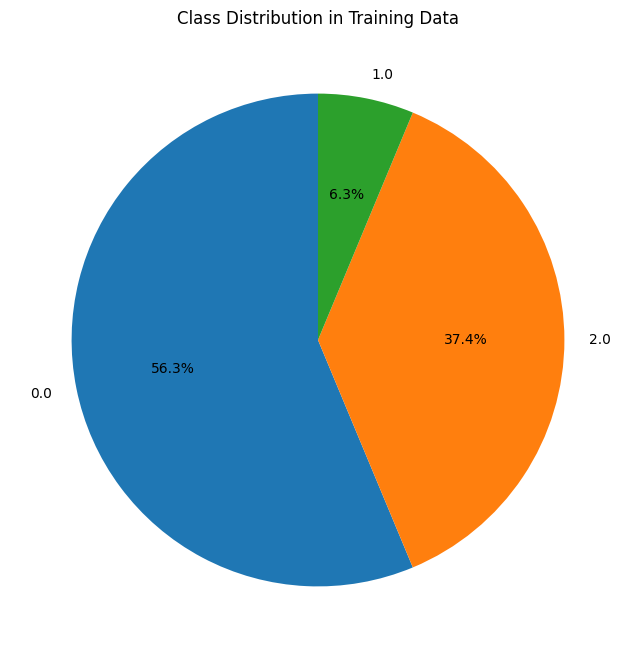

In [44]:
#@title Pie Chart of Class Distribution
plt.figure(figsize=(8, 8))
y_train.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in Training Data')
plt.ylabel('') # Remove default y-label
plt.show()

The 3 classes are pretty imbalanced, especially the sample size for class 1. Imbalance is usually removed by adding new samples to the dataset. Oversampling can be done by copying random columns or by creating synthetic data.

We will go with the second approach. There is a method called SMOTE that is oftehn used to create synthetic values in the dataset. We will apply SMOTE to create some fake rows.

In [45]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define target counts: only oversample class 1.0 up to 100 samples (instead of balancing fully)
target_counts = {0.0: 188, 2.0: 125, 1.0: 80}

# Apply SMOTE with custom sampling_strategy
smote = SMOTE(sampling_strategy=target_counts, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Shape of training data before SMOTE:", X_train_scaled.shape)
print("Shape of training data after SMOTE:", X_train_resampled.shape)

print("\nClass distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Shape of training data before SMOTE: (334, 18)
Shape of training data after SMOTE: (393, 18)

Class distribution before SMOTE:
0.0    188
2.0    125
1.0     21
Name: count, dtype: int64

Class distribution after SMOTE:
0.0    188
2.0    125
1.0     80
Name: count, dtype: int64


In [46]:
result_resampled = train_and_evaluate_models(X_train_resampled, y_train_resampled, X_test_scaled, y_test)

LogisticRegression Accuracy: 0.8095238095238095
RandomForestClassifier Accuracy: 0.8095238095238095
AdaBoostClassifier Accuracy: 0.7261904761904762
GradientBoostingClassifier Accuracy: 0.7976190476190477
SVC Accuracy: 0.7857142857142857
DecisionTreeClassifier Accuracy: 0.7261904761904762
KNeighborsClassifier Accuracy: 0.6547619047619048
MLPClassifier Accuracy: 0.7619047619047619
GaussianNB Accuracy: 0.7261904761904762


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


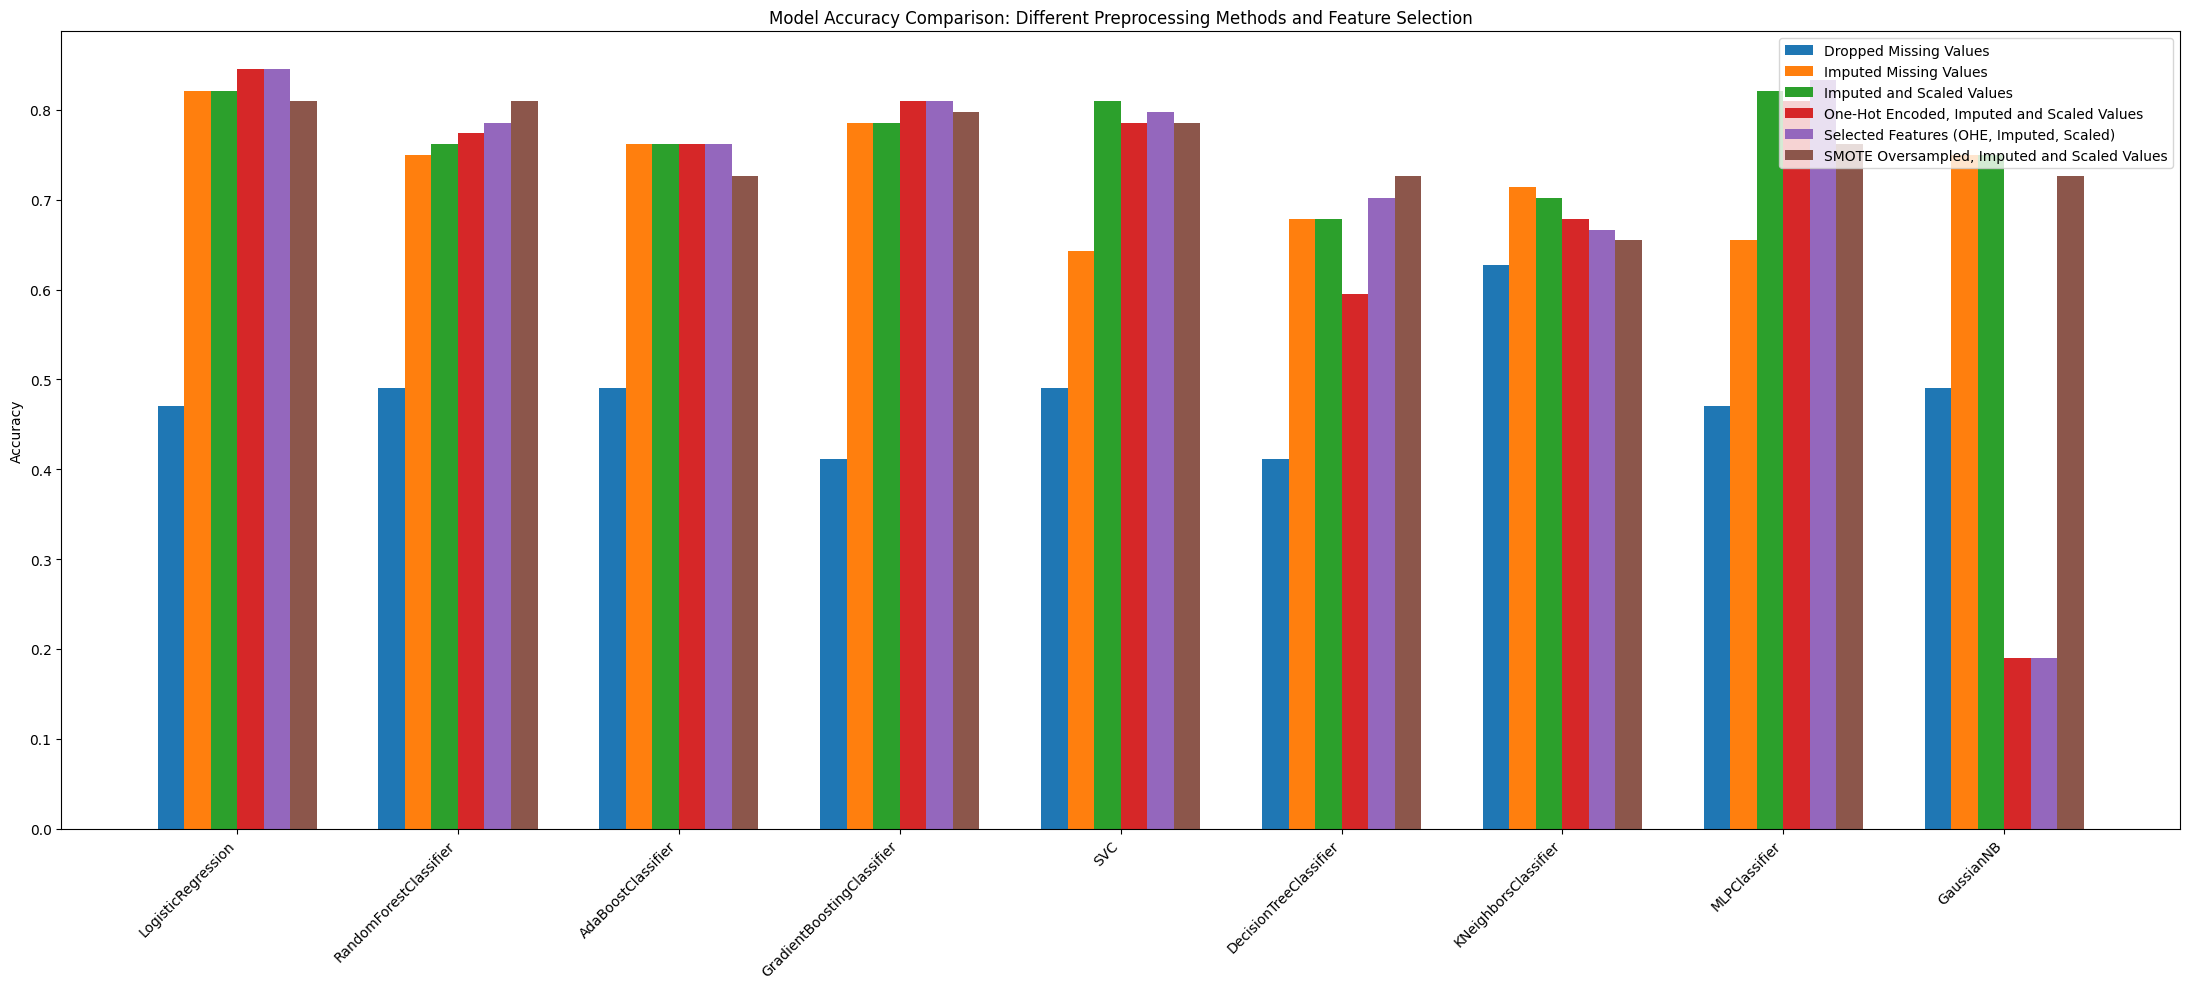

In [47]:
#@title Model Accuracy Comparison

models = list(result_ohe.keys()) # Use keys from ohe as it likely has all models
accuracies_dropped = [result_encoded_dropped.get(model, 0) for model in models] # Get accuracy for dropped, use 0 if model not present
accuracies_imputed = [result_imputed.get(model, 0) for model in models] # Get accuracy for imputed, use 0 if model not present
accuracies_imputed_scaled = [result_scaled.get(model, 0) for model in models] # Get accuracy for imputed and scaled, use 0 if model not present
accuracies_ohe = list(result_ohe.values())
accuracies_selected = [result_selected_features.get(model, 0) for model in models] # Get accuracy for selected features, use 0 if model not present
accuracies_resampled = [result_resampled.get(model, 0) for model in models] # Get accuracy for resampled, use 0 if model not present


x = np.arange(len(models))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots(figsize=(22, 10))

rects1 = ax.bar(x - width*2.5, accuracies_dropped, width, label='Dropped Missing Values')
rects2 = ax.bar(x - width*1.5, accuracies_imputed, width, label='Imputed Missing Values')
rects3 = ax.bar(x - width*0.5, accuracies_imputed_scaled, width, label='Imputed and Scaled Values')
rects5 = ax.bar(x + width*0.5, accuracies_ohe, width, label='One-Hot Encoded, Imputed and Scaled Values')
rects6 = ax.bar(x + width*1.5, accuracies_selected, width, label='Selected Features (OHE, Imputed, Scaled)')
rects7 = ax.bar(x + width*2.5, accuracies_resampled, width, label='SMOTE Oversampled, Imputed and Scaled Values')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison: Different Preprocessing Methods and Feature Selection')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

SMOTE oversampling was successful in some cases, not so much in others. That's because the data is too imbalanced. Creating synthetic values might not be suitable for all cases. For the next strategy we will ignore the resampling as for most models performance after resampling is low.

## 4 Hyperparameter Tuning

Hyperparameter tuning is the process of finding the best “settings” for a machine learning model, like learning rate, number of layers, or tree depth, which aren’t learned from the data but chosen beforehand. The right tuning can drastically improve performance, while bad choices can ruin even a strong model. Common approaches include manual tweaking, grid search, random search, or smarter methods like Bayesian optimization. In practice, learning rate is often the most important to get right, and using tools like Optuna or GridSearchCV can make the process easier and more systematic.

For our final test, we will tune the hyperparameter of one of our models. Let's use Random Forest. So we will use gridsearch to find the best hyperparameters for Random Forest.

Realistically, hyperparameter tuning is performced on validation set. We will use 5 fold stratified cross validation for this.

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid_rf,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation accuracy: ", grid_search_rf.best_score_)

best_rf_clf = grid_search_rf.best_estimator_
y_pred_tuned_rf = best_rf_clf.predict(X_test_scaled)
test_accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print(f"Test set accuracy: {test_accuracy_tuned_rf:.4f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy:  0.8041220382992534
Test set accuracy: 0.8095


/tmp/ipython-input-3951609482.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


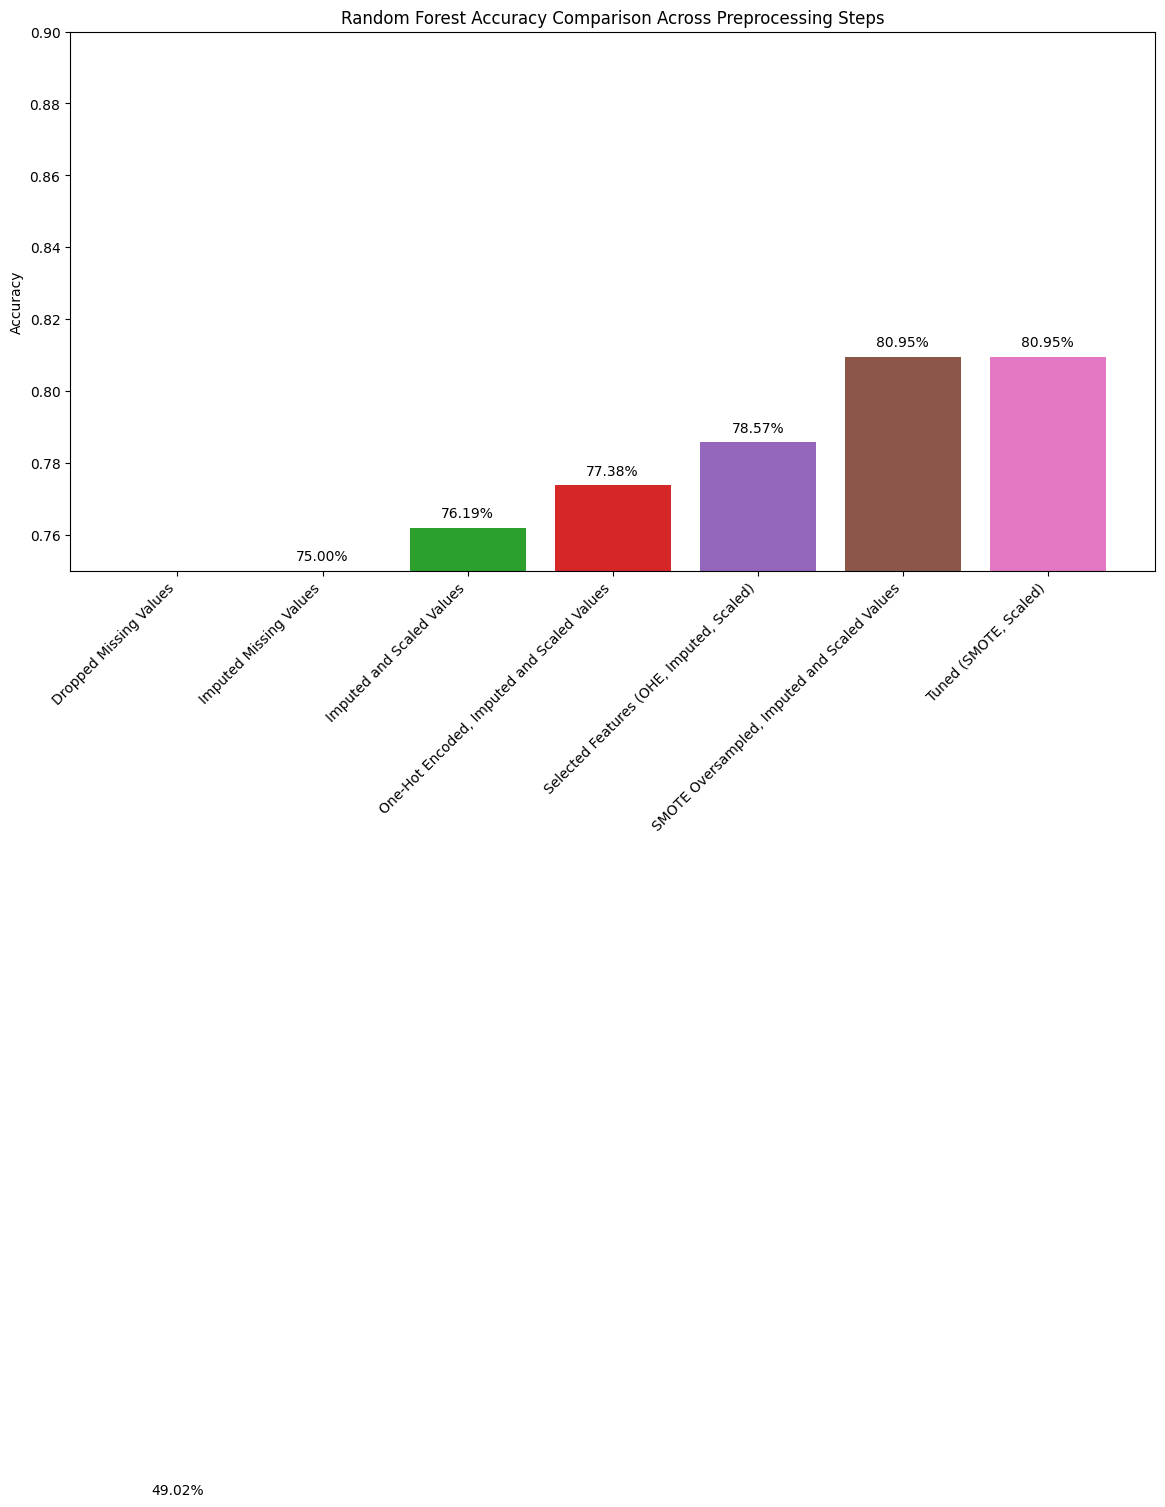

In [ ]:
#@title Random Forest Accuracy Comparison

rf_accuracies = {
    'Dropped Missing Values': result_encoded_dropped.get('RandomForestClassifier', 0),
    'Imputed Missing Values': result_imputed.get('RandomForestClassifier', 0),
    'Imputed and Scaled Values': result_scaled.get('RandomForestClassifier', 0),
    'One-Hot Encoded, Imputed and Scaled Values': result_ohe.get('RandomForestClassifier', 0),
    'Selected Features (OHE, Imputed, Scaled)': result_selected_features.get('RandomForestClassifier', 0),
    'SMOTE Oversampled, Imputed and Scaled Values': result_resampled.get('RandomForestClassifier', 0),
    'Tuned (SMOTE, Scaled)': test_accuracy_tuned_rf
}

labels = list(rf_accuracies.keys())
accuracies = list(rf_accuracies.values())

# Tableau 10 colors
colors = [
    "#1f77b4",  "#ff7f0e",  "#2ca02c",  "#d62728",
    "#9467bd",  "#8c564b",  "#e377c2"
]

plt.figure(figsize=(14, 7))
bars = plt.bar(labels, accuracies, color=colors)
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy Comparison Across Preprocessing Steps')
plt.xticks(rotation=45, ha="right")
plt.ylim(0.75, 0.9)  # Zoom in on the relevant range for better visibility

# Annotate bars with percentages
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.002,
        f"{height:.2%}",  # format as percentage
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()
